---
toc: true
comments: true
layout: post
title: Tri 1 Final Individual Review
type: hacks
courses: { csa: {week: 11} }
---

# Issue Recap

I tried to keep track and document everything with issues. They can be seen [here](https://github.com/BobTheFarmer/VACTQ-Typing-Game/issues). 

- [Sign in page](https://github.com/BobTheFarmer/VACTQ-Typing-Game/issues/7): Documents the first thing I worked on for frontend, a basic wireframe for a sign in page. We did not end up using this.
- [Game Control Loop](https://github.com/BobTheFarmer/VACTQ-Typing-Game/issues/5): This issue shows how I built the game loop, which updates the positions of all the cars from API data. This script is center to connecting the frontend and backend. 
- [Typing System](https://github.com/BobTheFarmer/VACTQ-Typing-Game/issues/9): Shows the typing system and the process used to make it. It also shows the API connection, but that part was added later.
- [Fixing the Backend Issues](https://github.com/BobTheFarmer/VACTQ-Typing-Game/issues/6): We had some problems deploying the backend and this documents how I fixed it.
- [Phrases API](https://github.com/BobTheFarmer/VACTQ-Typing-Game/issues/8): I changed the jokes API to contain phrases instead to be used in the game.
- [Players API](https://github.com/BobTheFarmer/VACTQ-Typing-Game/issues/11): I had to redo the players API because we were having a lot of problems fixing bugs. 

# Game Systems Overview

You can see an overview [here](https://github.com/BobTheFarmer/VACTQ-Typing-Game/issues/new) of the projects layout. Stuff I worked on is in orange.

# Key Commits

- [Game Loop](https://github.com/BobTheFarmer/VACTQ-Typing-Game/commit/fea8c0630c277b45896454dc2f539741aa57d2d0): Here I started the outline for the center of our project. 
- [Typing System](https://github.com/BobTheFarmer/VACTQ-Typing-Game/commit/f6026b16960c157547d34d58cfcb7e6541fffbbe): This is where I started work on the typing system and laid down the basics for that.
- [Player backend and Phrases fix](https://github.com/BobTheFarmer/VACTQ-Backend4/commit/682368dbc71e04e09e3a35be2832b064ea391b6c): This commit represents me understanding Spring a lot better and being able to overcome all the errors we were struggling with.

# Summary of my most important work

# Game Loop

The frontend needs a central script to update the positions of the cars from the API data. It's also important that this script is well-connected both to the animation and the backend, acting as the connector. 

## Use of OOP

I want to store the position data in an object that mirrors the backend objects. This will make the process of updating the player positions easier. The Player object needs to do four things:

- Store the index of each player
- Store the progress of each car along the track (to be pulled from backend)
- Update the position of the cars by being passed JSON data
- Reset the progress of the cars

```
  class Player {
      constructor(index) {
          this.progress = 0;
          this.index = index;
      }
      
      reset() {
          this.progress = 0;
      }
  
      update(positionData) {
          this.progress = positionData[this.index];
      }
  }
```

Notice how the update takes all the JSON data and interprets it rather than just take its own data.  That will make the code more concise and easier to write later.

## Ticking system

To avoid inconsistencies in how fast positions are updated depending on connection speed, I used a ticking system to only call the API over some interval. A constant is used to make this interval easily adjustable.

```
const tickRate = 1000;
```

```
function tick() {
    updatePositions(getAPIData());

    //Update cars animations
    
}

let interval = setInterval(tick, tickRate);
```
# Typing System

## API Connection

I used async requests to update the position of the cars. Here's what that looks like: 


```
async function updatePosition(index, pos) {
    const url = `localhost:8085/api/ptest/move/${index}/${pos}/`;
    try {
        const response = await fetch(url, {
            method: 'POST', // or 'PUT'
            headers: {
                'Content-Type': 'application/json',
            },
        });
        if (!response.ok) {
            throw new Error(`HTTP error! status: ${response.status}`);
        }
        const data = await response.json();
        return data;
    } catch (error) {
        console.error('There has been a problem with your fetch operation:', error);
    }
}
```

# Fixing the backend issues

## Using GitLens to fix it

Mr. Mort also showed me how to use GitLens to investigate this further. GitLens is an extension in vscode which allows you to easily back up to previous commits. We used this to find that going back a couple of weeks allows the backend to run correctly.

## How I will avoid mistakes like this in the future

I wasted a lot of time investigating the jwt error, but it turned out it was not important to the overall problem. In the future, I will be more careful not to blindly follow the error but read it carefully and take a more direct approach to the problem, rather than just look for anything related to the error in the code. I will also not be afraid to ask for help if I get stuck on something like this. 

# Phrases API

## 'Sculpting' approach

The jokes API already provided by Mr. Mort is very similar to what I need to make. All I needed to do was remove the like and jeer system, leaving only the index and the jokes in the API. 

The final phrases API is just like the jokes API but with all that removed. Here's what that looks like: 

```
@Data  // Annotations to simplify writing code (ie constructors, setters)
@NoArgsConstructor
@AllArgsConstructor
@Entity // Annotation to simplify creating an entity, which is a lightweight persistence domain object. Typically, an entity represents a table in a relational database, and each entity instance corresponds to a row in that table.
public class Jokes {
    @Id
    @GeneratedValue(strategy = GenerationType.AUTO)
    private Long id;

    @Column(unique=true)
    private String joke;

    // starting jokes
    public static String[] init() {
        final String[] jokesArray = {
            "If you give someone a program... you will frustrate them for a day; if you teach them how to program... you will frustrate them for a lifetime.",
            "Q: Why did I divide sin by tan? A: Just cos.",
            "UNIX is basically a simple operating system... but you have to be a genius to understand the simplicity.",
            "Enter any 11-digit prime number to continue.",
            "If at first you don't succeed; call it version 1.0.",
            "Java programmers are some of the most materialistic people I know, very object-oriented",
            "The oldest computer can be traced back to Adam and Eve. It was an apple but with extremely limited memory. Just 1 byte. And then everything crashed.",
            "Q: Why did Wi-Fi and the computer get married? A: Because they had a connection",
            "Bill Gates teaches a kindergarten class to count to ten. 1, 2, 3, 3.1, 95, 98, ME, 2000, XP, Vista, 7, 8, 10.",
            "Q: What’s a aliens favorite computer key? A: the space bar!",
            "There are 10 types of people in the world: those who understand binary, and those who don’t.",
            "If it wasn't for C, we’d all be programming in BASI and OBOL.",
            "Computers make very fast, very accurate mistakes.",
            "Q: Why is it that programmers always confuse Halloween with Christmas? A: Because 31 OCT = 25 DEC.",
            "Q: How many programmers does it take to change a light bulb? A: None. It’s a hardware problem.",
            "The programmer got stuck in the shower because the instructions on the shampoo bottle said: Lather, Rinse, Repeat.",
            "Q: What is the biggest lie in the entire universe? A: I have read and agree to the Terms and Conditions.",
            "An SQL statement walks into a bar and sees two tables. It approaches, and asks may I join you?"
        };
        return jokesArray;
    }
```

# Players API

## The problems

- Null data error: This error happened because I made significant changes to the API without deleting the sqlite.db file. What would happen is the data in the same table would be formatted in two different ways, leading to too many types of data and resulting and empty or 'null' data. This is not permitted with security standards
- CORs error: This was the error that I got stuck on for the longest. After researching it, CORs is a browser security protocol to protect users from malicious attacks. I eventually figured out I had to configure CORs inside the security file in spring. 

## New understanding of Spring

After making this API and the phrases API, I think I understand Spring a lot better than before. This section will go over what I learned.

 I found that Spring is very similar to the python API from CSP, but with much more abstraction, making it a little harder to understand but also easier to use once you understand it. This graph outlines my understanding of how it works: 

![Spring Understanding (2)](https://github.com/BobTheFarmer/VACTQ-Typing-Game/assets/48264249/23481b68-bf96-4ce3-b0b0-783f90928629)

Go [here](https://github.com/BobTheFarmer/VACTQ-Typing-Game/issues/11) if image does not work.

## Final API

Once I fixed the errors and had a better understanding of Spring, it was easy to create the players API. All I did was modify jokes to make the jokes into names, and added a position value. 

```
  @Id
  @GeneratedValue(strategy = GenerationType.AUTO)
  private Long id;

  @Column(unique=true)
  private String joke;

  private int pos;
  //private int pos;

  // starting jokes
  public static String[] init() {
      final String[] playerNames2 = {
          "P1",
          "P2",
          "P3",
          "P4"
      };

      return playerNames2;
```

```
Optional<PTest> optional = repository.findById(id);
    if (optional.isPresent()) {  // Good ID
        PTest joke = optional.get();  // value from findByID
        joke.setPos(newPos); // increment value
        repository.save(joke);  // save entity
        return new ResponseEntity<>(joke, HttpStatus.OK);  // OK HTTP response: status code, headers, and body
    }
```


# CB Quiz

![Screenshot 2023-11-06 at 9.09.29 AM.png](<attachment:Screenshot 2023-11-06 at 9.09.29 AM.png>)
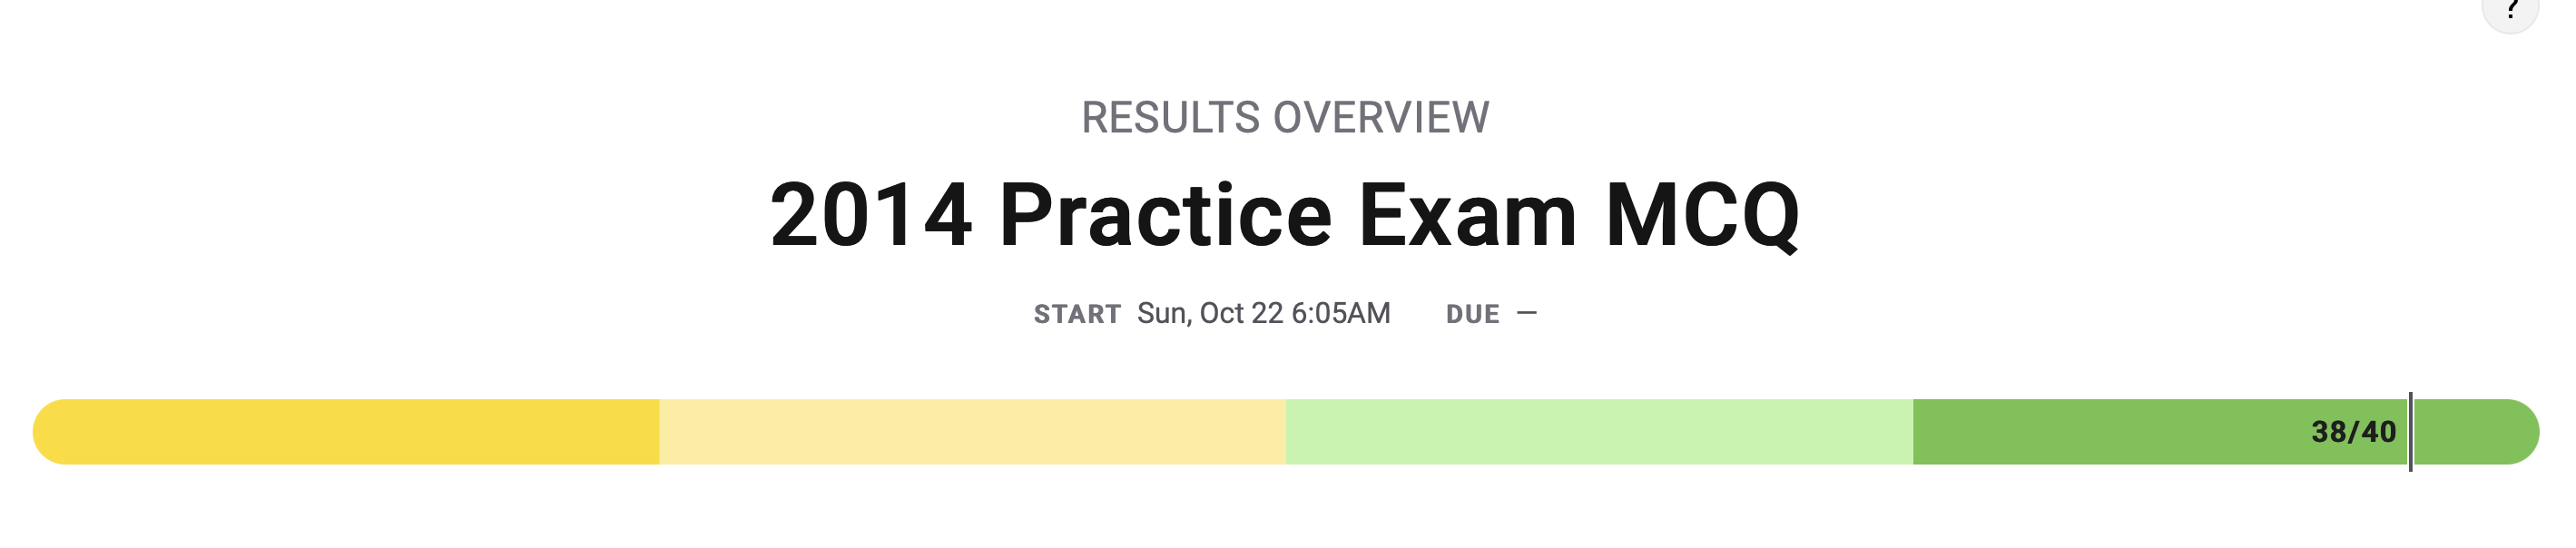

# Extra credit

![Screenshot 2023-11-06 at 9.23.11 AM.png](<attachment:Screenshot 2023-11-06 at 9.23.11 AM.png>)
![Screenshot 2023-11-06 at 9.36.58 AM.png](<attachment:Screenshot 2023-11-06 at 9.36.58 AM.png>)
![Screenshot 2023-11-06 at 9.40.59 AM.png](<attachment:Screenshot 2023-11-06 at 9.40.59 AM.png>)

## Mistakes

### Question 4

Consider the following code segment.

```A 7-line code segment reads as follows.
Line 1: int x equals 7, semicolon. Line 2: int y equals 3, semicolon. Line 3: blank. Line 4: if, open parenthesis, open parenthesis, x less than 10, close parenthesis, ampersand, ampersand, open parenthesis, y less than 0, close parenthesis, close parenthesis. Line 5: System, dot, out, dot, print l n, open parenthesis, open double quote, Value is, colon, close double quote, plus, x, asterisk, y, close parenthesis, semicolon. Line 6: else. Line 7: System, dot, out, dot, print l n, open parenthesis, open double quote, Value is, colon, close double quote, plus, x, forward slash, y, close parenthesis, semicolon.
```

What is printed as a result of executing the code segment?

I forgot that integer division would cause it to be rounded. I will remember in the future to do this.

### Question 23


A 12-line code segment reads as follows.
```Line 1: private List, open angular bracket, String, close angular bracket, animals, semicolon.
Line 2: blank.
Line 3: public void manipulate, open parenthesis, close parenthesis.
Line 4: open brace.
Line 5: for, open parenthesis, int k equals animals, dot, size, open parenthesis, close parenthesis, minus 1, semicolon, k greater than 0, semicolon, k, minus, minus, close parenthesis.
Line 6: open brace.
Line 7: if, open parenthesis, animals, dot, get, open parenthesis, k, close parenthesis, dot, substring, open parenthesis, 0 comma 1, close parenthesis, dot, equals, open parenthesis, open double quote, b, close double quote, close parenthesis, close parenthesis.
Line 8: open brace.
Line 9: animals, dot, add, open parenthesis, animals, dot, size, open parenthesis, close parenthesis, - k comma animals, dot, remove, open parenthesis, k, close parenthesis, close parenthesis, semicolon.
Line 10: close brace.
Line 11: close brace.
Line 12: close brace.
Assume that animals has been instantiated and initialized with the following contents.
```

 

["bear", "zebra", "bass", "cat", "koala", "baboon"]
What will the contents of animals be as a result of calling manipulate?

I said ["zebra", "cat", "koala", "baboon", "bass", "bear"] but i interpreted the algorithm wrong

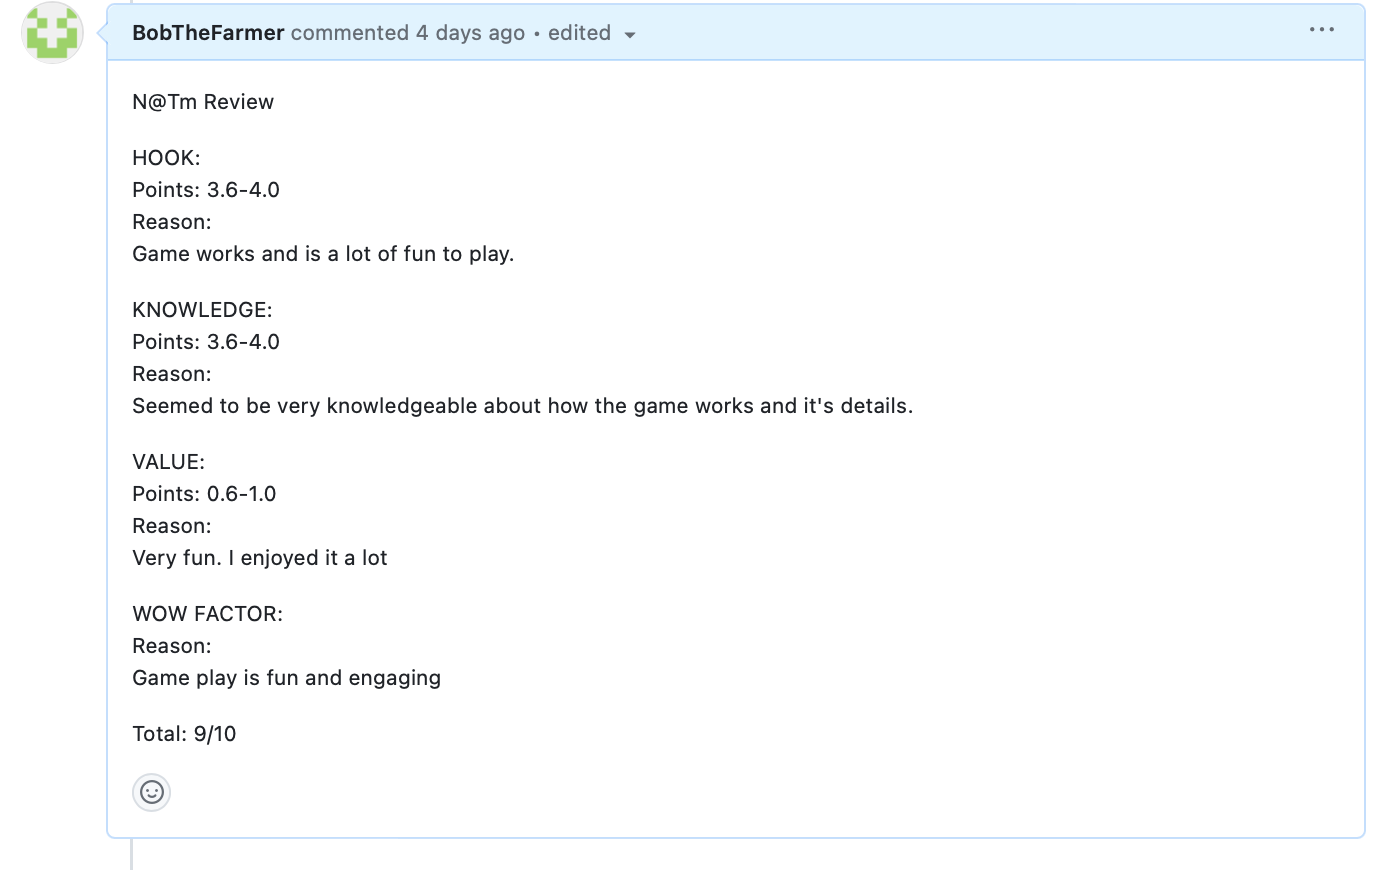
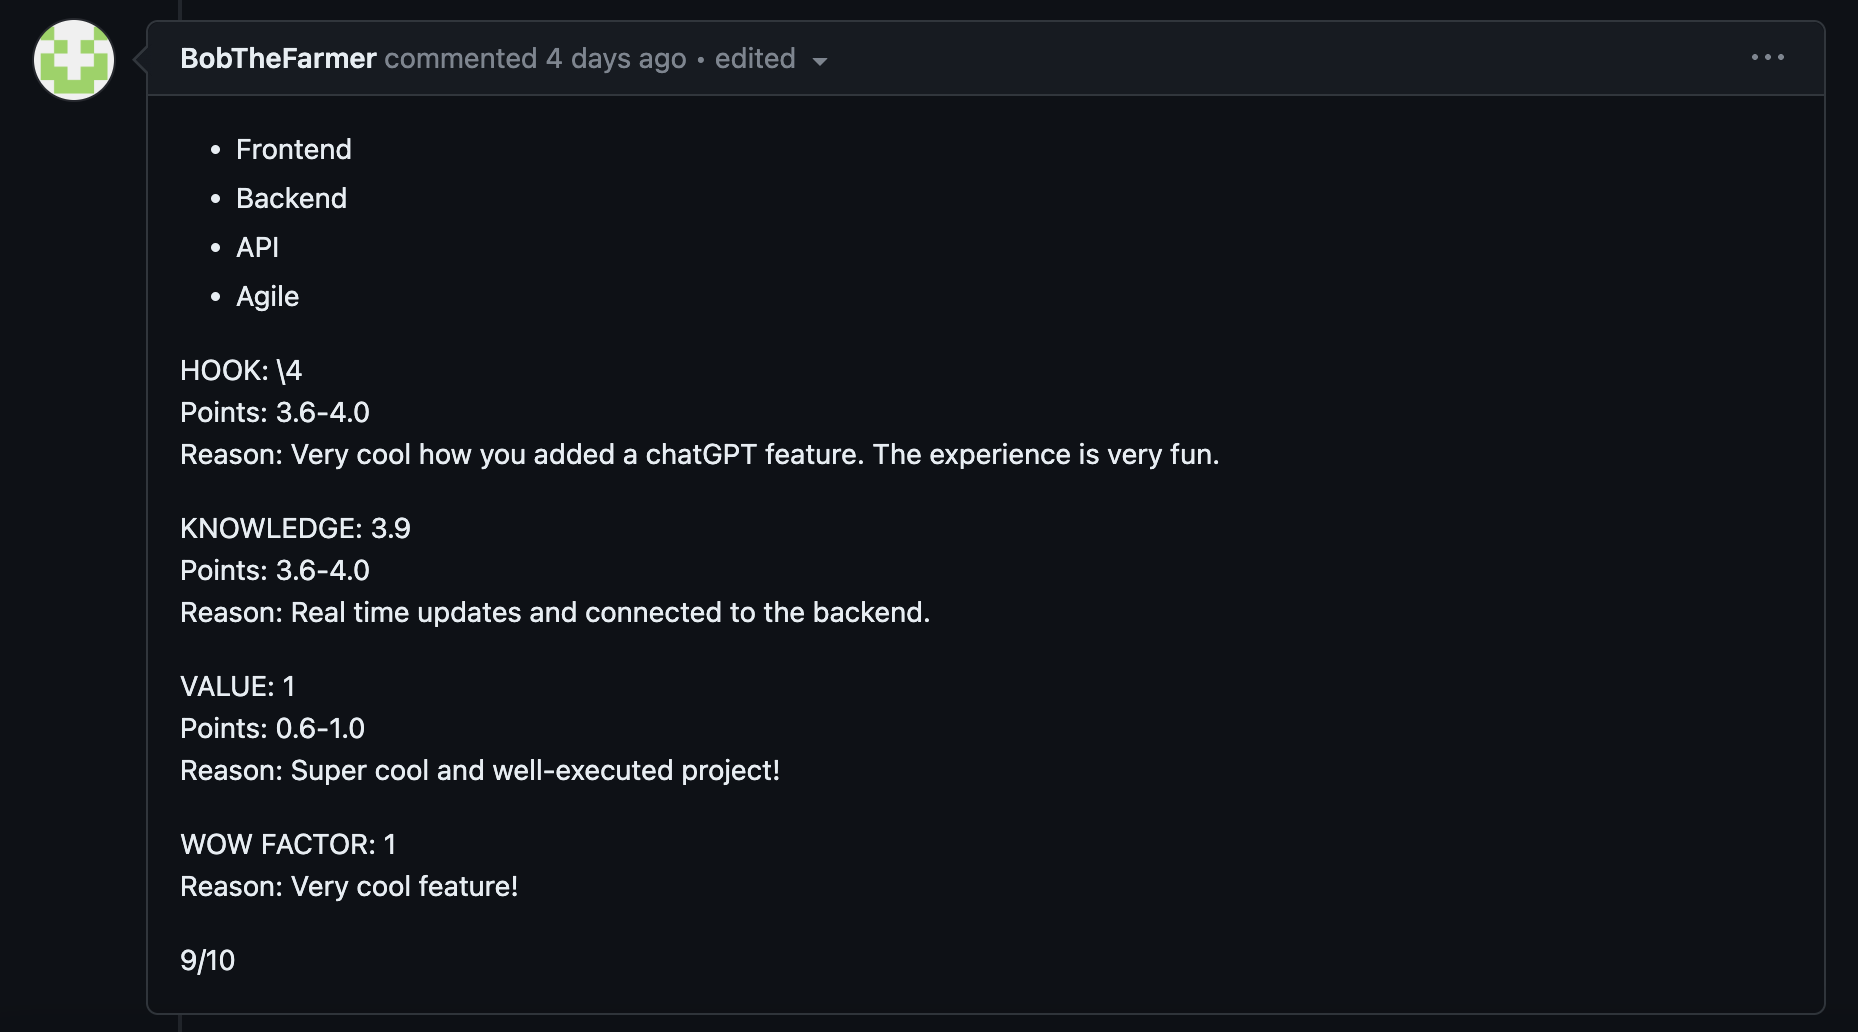
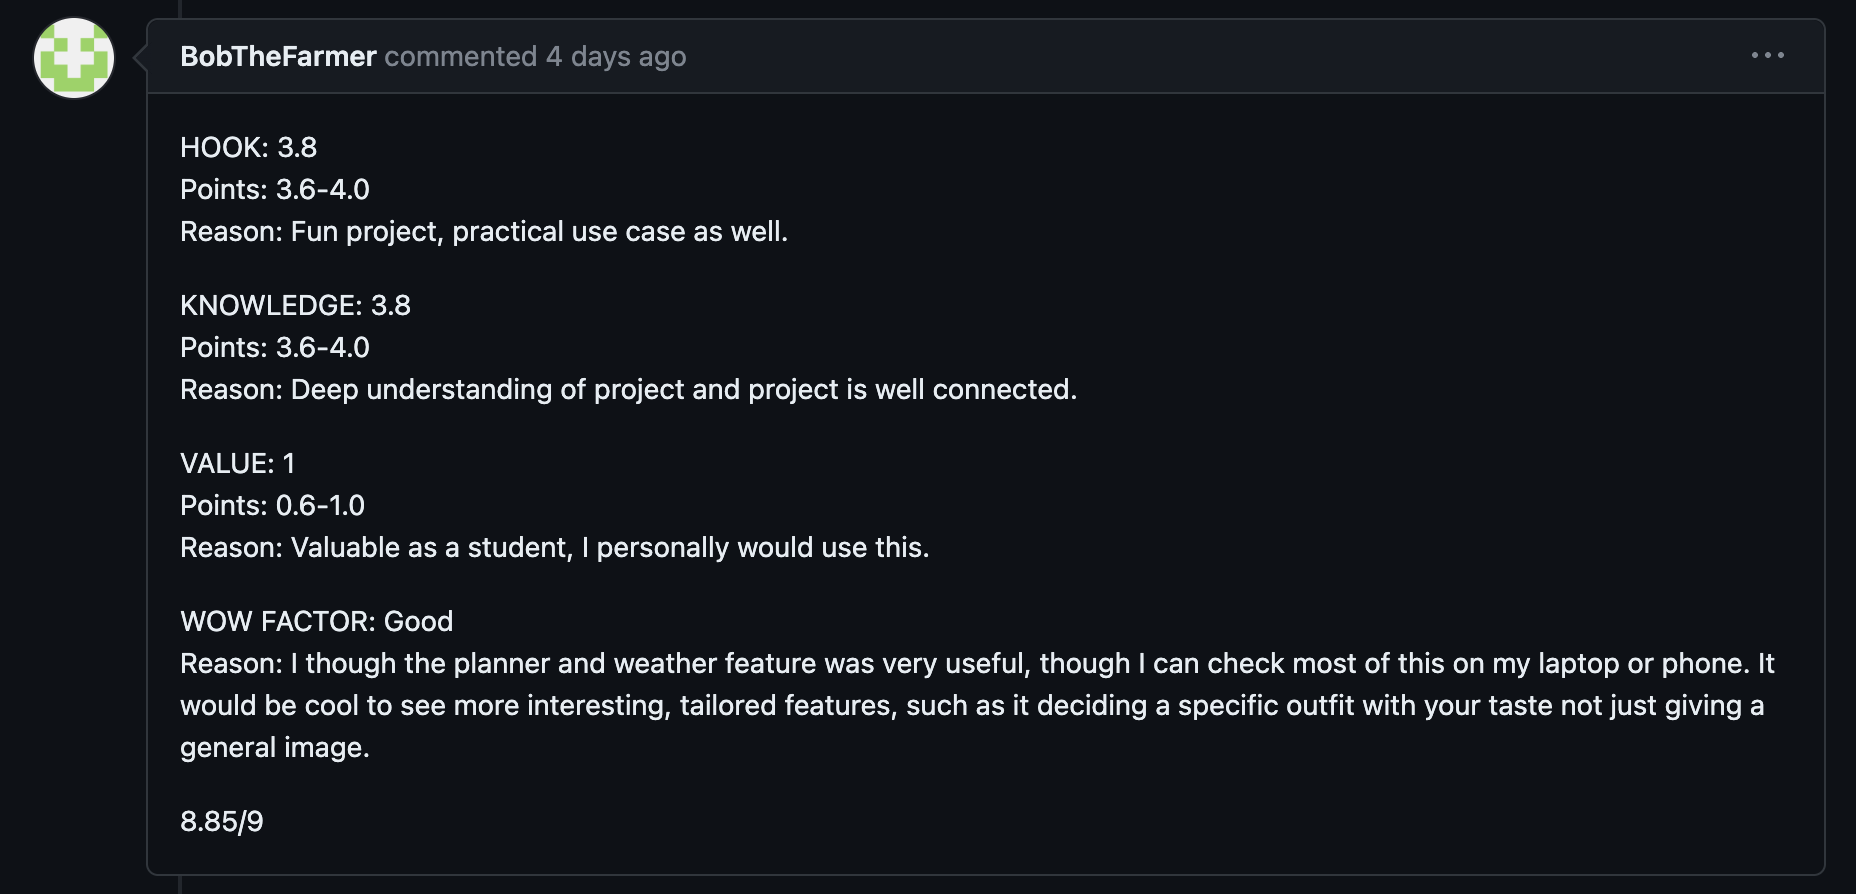